<h1 align="center">STACKOVERFLOW SEARCH ENGINE</H1> 

In [0]:
!pip freeze > requirements.txt

<h4> Problem </h4>
<p>
build a search engine based on StackOverflow questions, the search results should include the semantic meaning
https://meta.stackexchange.com/questions/138356/how-do-i-download-stack-overflows-data think of scalable 
architecture and try to reduce the time to return the results.
    
<h5> Objectives </h5>
<p>
1) Find top k posts which is more similar or sementically similar to the given query posts
</p>

<h5> Constraints </h5>
1) Low latency  <br>
2) Scalability

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
import math
import threading
from nltk.corpus import wordnet
import time
from multiprocessing import Process, Queue
import multiprocessing
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
import csv 
import requests 
import xml.etree.ElementTree as ET 
import os
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from multiprocessing import Pool
import time
import random
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import RegexpTokenizer
from gensim.models import Word2Vec
import random
from nltk.stem.porter import *
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from multiprocessing import Pool, Manager
from datetime import datetime

/content/drive/My Drive/StackOverflow-Search-Engine-master
/content/drive/My Drive/StackOverflow-Search-Engine-master
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/StackOverflow-Search-Engine-master
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/StackOverflow-Search-Engine-master
/content/drive/My Drive/StackOverflow-Search-Engine-master


In [0]:
# specifying the fields for csv file 
fields = ['Id', 'Text', 'Topic']

def parseXML(xmlfile, start_count): 
    """This function would parse XML file and would extract important information from xml tag 'text' 
    and returns list containing dict whcih would have text"""
    #https://www.geeksforgeeks.org/xml-parsing-python/
    #create element tree object 
    print("File", xmlfile)
    tree = ET.parse(xmlfile) # Creates a parse tree like https://www.google.com/search?q=xml+parse+tree&sxsrf=ALeKk00rw2XjRSAi-qGfaA0Rg4EtJzyx_Q:1585918970675&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi0wY7HqMzoAhVXAXIKHYfdDrkQ_AUoAXoECA4QAw&biw=1366&bih=657#imgrc=P4mJt0kjVEuqVM
    topic = xmlfile.split("/")[1].split("_")[0] # Getting xml file_name from string containing directory/file_name.xml 
    # get root element using which we would parse xml tree
    root = tree.getroot() 
    # create empty list for news items 
    newsitems = [] 
    count = start_count
    # iterate news items 
    for each_row in root.iter("row"):#  iterates only over those elements that have the required tag:"row" 
        news = {}
        news["Id"] = count
        news["Text"] = each_row.attrib["Body"]
        news["Topic"] = topic
        count=count+1
        newsitems.append(news) #[{id:1,text:" Some text  ",Topic : "AI"},{{id:1,text:" Some text  ",Topic : "AI"},{{id:1,text:" Some text  ",Topic : "AI"},...........]
    # return news items list 
    print("len", len(newsitems))
    return newsitems # To save this dict on csv we are putting dict into a list https://www.tutorialspoint.com/How-to-save-a-Python-Dictionary-to-CSV-file

In [0]:
def savetoCSV(newsitems, filename): 
    """Writes the list of dict returned from above function onto a csv file""" 
    # writing to csv file 
    with open(filename, 'w', encoding = 'utf-8') as csvfile: 
        # creating a csv dict writer object 
        writer = csv.DictWriter(csvfile, fieldnames = fields) 
        # writing headers (field names) 
        writer.writeheader() 
        # writing data rows 
        writer.writerows(newsitems) 

In [0]:
def filterpostfiles(filename):
    """Returns the name of  xml files present in the directory CML Files """
    return filename.endswith("Posts.xml") 
postfiles = filter(filterpostfiles, os.listdir("XML Files"))

# specifying the fields for csv file 
fields = ['Id', 'Text', 'Topic']  
start_count = 0
for each_file in postfiles:
    print(each_file)
    # parse xml file 
    newsitems = parseXML("XML Files/"+each_file, start_count)
    #Get only name of xml file by sepearting out extension use the same name to save file as .csv 
    csv_filename = each_file.split('.')[0] + ".csv"
    print("csv_filename", csv_filename)
    # store news items in a csv file 
    savetoCSV(newsitems, "CSV Files/" + csv_filename)
    start_count = len(newsitems) + start_count

AIMeta_Posts.xml
File XML Files/AIMeta_Posts.xml
len 608
csv_filename AIMeta_Posts.csv
AI_Posts.xml
File XML Files/AI_Posts.xml
len 12546
csv_filename AI_Posts.csv
ComputerGraphicsMeta_Posts.xml
File XML Files/ComputerGraphicsMeta_Posts.xml
len 282
csv_filename ComputerGraphicsMeta_Posts.csv
ComputerGraphics_Posts.xml
File XML Files/ComputerGraphics_Posts.xml
len 5399
csv_filename ComputerGraphics_Posts.csv
CSMeta_Posts.xml
File XML Files/CSMeta_Posts.xml
len 1537
csv_filename CSMeta_Posts.csv
CS_Posts.xml
File XML Files/CS_Posts.xml
len 73252
csv_filename CS_Posts.csv
DataScienceMeta_Posts.xml
File XML Files/DataScienceMeta_Posts.xml
len 466
csv_filename DataScienceMeta_Posts.csv
DataScience_Posts.xml
File XML Files/DataScience_Posts.xml
len 43650
csv_filename DataScience_Posts.csv


In [0]:
def filtercsvpostfiles(filename):
    """ Returns all the csv file name extracted from XML which are stored in CSV files"""
    return filename.endswith("Posts.csv") 
csvpostfiles = filter(filtercsvpostfiles, os.listdir("CSV Files"))

In [0]:
total_dataframe = pd.DataFrame(columns=fields)
for each_file in csvpostfiles:
    #Merge multiple csv file created from each xml file into just one xml file
    print("each file", each_file)
    df = pd.read_csv("CSV Files/"+ each_file)
    print("shape", df.shape)
    total_dataframe = total_dataframe.append(df, ignore_index=True)

each file AIMeta_Posts.csv
shape (608, 3)
each file AI_Posts.csv
shape (12546, 3)
each file ComputerGraphicsMeta_Posts.csv
shape (282, 3)
each file ComputerGraphics_Posts.csv
shape (5399, 3)
each file CSMeta_Posts.csv
shape (1537, 3)
each file CS_Posts.csv
shape (73252, 3)
each file DataScienceMeta_Posts.csv
shape (466, 3)
each file DataScience_Posts.csv
shape (43650, 3)


In [0]:
print("Shape of total dataframe", total_dataframe.shape)

Shape of total dataframe (137740, 3)


In [0]:
#Removing NAN and Null text valued data
total_dataframe = total_dataframe[~total_dataframe['Text'].isna()]
total_dataframe = total_dataframe[~total_dataframe['Text'].isnull()]
print("Shape of total dataframe after null value remove", total_dataframe.shape)

Shape of total dataframe after null value remove (137126, 3)


In [0]:
total_dataframe.to_pickle("QuestionsDataSet.pkl")

<h2> 1. Data Preprocessing </h2>
<p>
1) Since all the posts are not merely text it is a html components, some preprocessing is required to 
perform before performing document embedding on the posts text
</p>
<p>
2) Simple data preprocessing techniques incorporated are: <br>
1) removal of html tags <br>
2) removal of punctuations like %,&,~ <br>
3) removal of stop words <br>
</p>

In [0]:
total_df = pd.read_pickle("QuestionsDataSet.pkl")

In [0]:
total_df.head(5)

,Id,Text,Topic
0,0,"<p>Besides being ""one of the 7 meta questions ...",AIMeta
1,1,"<p>I've clicked on <em>chat</em> link, but the...",AIMeta
2,2,<p>I think this will be a crucial thing to fig...,AIMeta
3,3,<p>Are all questions asked on stats and data s...,AIMeta
4,4,<p>I've seen several questions that use the <a...,AIMeta


In [0]:
for i in range(10):
    print(total_df.iloc[i]['Text'])
    print("="*40)

<p>Besides being "one of the 7 meta questions every site should ask", it's just plain important. An "AI Stackexchange" site has been tried before, at least once, and possibly a few times.   And in the past, it's been killed for lack of activity.  :-(</p>

<p>So... how so we promote this site well enough to attract a critical mass of participants? And how do we get people participating?  </p>

<p>I've clicked on <em>chat</em> link, but the list is empty. Also I've tried to create one, but I couldn't, as it's saying:</p>

<blockquote>
  <p>This room might already exist.</p>
</blockquote>

<p>But it's not there yet.</p>

<p>I think this will be a crucial thing to figure out.  On the one hand, I think it's important to be as inclusive as possible, and avoid being overly pedantic and stay away from the extreme degree of elitism that infects many stackexchange sites.  BUT.. on the other hand, we want the site to be of interest to everyone from hobbyists to serious academic researchers.   </p


<p>I created a new <a href="http://chat.stackexchange.com/rooms/43371/artificial-intelligence">chat room for this site</a>.</p>

<p>Seems like the one from the previous AI site prevented creating a chat room.</p>



In [0]:
print(total_df['Topic'].unique()) #Unique topics 

['AIMeta' 'AI' 'ComputerGraphicsMeta' 'ComputerGraphics' 'CSMeta' 'CS'
 'DataScienceMeta' 'DataScience']


In [0]:
posts_text = total_df['Text'].values
print("Posts_text shape", posts_text.shape)

Posts_text shape (137126,)


In [0]:
posts_text[11]

'<p>I\'m going to say "yes".  That doesn\'t mean we need to <em>solicit</em> those kinds of questions, but if / when they show up, I think we should just handle them "organically" if you will.  That is, up/down vote them, answer them, comment on them, etc., exactly as we would anything else.  I don\'t see any point in us taking on the effort of cross-checking with other sites and migrating questions, etc.   IF the SE infrastructure makes it super easy to do some in some cases, then sure, fine, I guess.  But I oppose having ai.se mods waste their energy and time dealing with pedantic quibbling over which site is "most" appropriate for a question.</p>\r\n'

<h3>1.1 Removal of HTML Tags </h3>

In [0]:
import re
#https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
def cleanhtml(raw_html):
    """Remove HTML TAG and convert text to lower case"""
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext.lower()

In [0]:
preprocessed_post_text = []
for i in range(posts_text.shape[0]):
    preprocessed_post_text.append(cleanhtml(posts_text[i]))
preprocessed_post_text = np.array(preprocessed_post_text)

In [0]:
preprocessed_post_text[11]

' i\'m going to say "yes".  that doesn\'t mean we need to  solicit  those kinds of questions, but if / when they show up, i think we should just handle them "organically" if you will.  that is, up/down vote them, answer them, comment on them, etc., exactly as we would anything else.  i don\'t see any point in us taking on the effort of cross-checking with other sites and migrating questions, etc.   if the se infrastructure makes it super easy to do some in some cases, then sure, fine, i guess.  but i oppose having ai.se mods waste their energy and time dealing with pedantic quibbling over which site is "most" appropriate for a question. \r\n'

<h3> 1.2 Removal of URLS </h3>

In [0]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+';
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = re.sub(url_regex, '', preprocessed_post_text[i]);

In [0]:
preprocessed_post_text[11]

' i\'m going to say "yes".  that doesn\'t mean we need to  solicit  those kinds of questions, but if / when they show up, i think we should just handle them "organically" if you will.  that is, up/down vote them, answer them, comment on them, etc., exactly as we would anything else.  i don\'t see any point in us taking on the effort of cross-checking with other sites and migrating questions, etc.   if the se infrastructure makes it super easy to do some in some cases, then sure, fine, i guess.  but i oppose having ai.se mods waste their energy and time dealing with pedantic quibbling over which site is "most" appropriate for a question. \r\n'

<h3> 1.3 Removal of Punctuations, stop words  </h3>

In [0]:
def cleanpunc(sentence): 
    """function to clean the word of any punctuation or special characters"""
    cleaned = re.sub(r'[?|!|"|#|:|=|+|_|{|}|[|]|-|$|%|^|&|]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|-|~|`|>|<|*|$|@|;|→]',r'',cleaned)
    return  cleaned

In [0]:
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = cleanpunc(preprocessed_post_text[i])

In [0]:
preprocessed_post_text[11]

" i'm going to say yes  that doesn't mean we need to  solicit  those kinds of questions but if  when they show up i think we should just handle them organically if you will  that is updown vote them answer them comment on them etc exactly as we would anything else  i don't see any point in us taking on the effort of crosschecking with other sites and migrating questions etc   if the se infrastructure makes it super easy to do some in some cases then sure fine i guess  but i oppose having aise mods waste their energy and time dealing with pedantic quibbling over which site is most appropriate for a question \r\n"

In [0]:
import re

def decontracted(phrase):
    # https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python same code snippet from assignment as well
    """ expanding and creating common English contractions in text"""
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\n", "", phrase)
    return phrase

In [0]:
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = decontracted(preprocessed_post_text[i])

In [0]:
non_stop_word_removed_posts = preprocessed_post_text

In [0]:
non_stop_word_removed_posts[11]

' i am going to say yes  that does not mean we need to  solicit  those kinds of questions but if  when they show up i think we should just handle them organically if you will  that is updown vote them answer them comment on them etc exactly as we would anything else  i do not see any point in us taking on the effort of crosschecking with other sites and migrating questions etc   if the se infrastructure makes it super easy to do some in some cases then sure fine i guess  but i oppose having aise mods waste their energy and time dealing with pedantic quibbling over which site is most appropriate for a question \r'

In [0]:
non_stop_word_removed_posts_df = pd.DataFrame(non_stop_word_removed_posts, columns=['non_stopword_removed_preprocessed_text'])
non_stop_word_removed_posts_df.index = total_df.index
non_stop_word_removed_posts_df['Id'] = total_df['Id']
total_df = total_df.merge(non_stop_word_removed_posts_df, on='Id',how='left')
total_df.to_pickle('non_stop_word_removed_posts.pkl')

In [0]:
# we use the list of stop words that are downloaded from nltk lib.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text):
    """Removes stop words and alpha numeric values"""
    if type(total_text) is not int:# Numbers doesn't make any sense in searching them
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        return string        

list of stop words: {'having', 'weren', 'now', "hasn't", 'against', 'all', 'about', 'these', 'themselves', 'were', 'am', "she's", 'ain', "doesn't", "mustn't", 'should', 'over', 'same', 'hers', 'that', 'yourself', 'those', 'this', 'until', "should've", 'you', 'just', 'aren', "aren't", 'yourselves', 'what', 'further', 'most', 'in', 'couldn', 'will', 'out', 'my', 'a', 'me', 've', 'him', 'her', "hadn't", 'them', 'been', 'his', 'are', 'o', 'the', 'its', 'himself', 'we', 'ourselves', 'be', 'have', 'an', 'theirs', 'why', 'each', 'such', 'did', 'i', "couldn't", 'up', 'more', 'while', 's', 'your', "you're", 'again', 'do', 'has', 'didn', 'once', 'mightn', 'by', 'through', 'hasn', 'was', 'and', 'if', 'ma', 'she', 'whom', 'for', 'some', 'then', 'any', 'needn', 'because', 'doesn', 'wasn', 'there', 'on', 'above', 'which', 'before', 'herself', 'their', 'y', 'd', "wouldn't", 'under', 'between', 'so', 'into', 'when', 'but', 'or', 'down', 'after', 'how', 'being', 'nor', 'they', 'few', "shouldn't", 'to',

In [0]:
import time
start_time = time.clock()
# we take each title and we text-preprocess it.
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = nlp_preprocessing(preprocessed_post_text[i], i)
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

371.8836029 seconds


In [0]:
preprocessed_post_text[11]

'going say yes mean need solicit kinds questions show think handle organically updown vote answer comment etc exactly would anything else see point us taking effort crosschecking sites migrating questions etc se infrastructure makes super easy cases sure fine guess oppose aise mods waste energy time dealing pedantic quibbling site appropriate question '

In [0]:
preprocesses_text_df = pd.DataFrame(preprocessed_post_text, columns=['preprocessed_text'])
preprocesses_text_df.index = total_df.index
preprocesses_text_df['Id'] = total_df['Id']
total_df = total_df.merge(preprocesses_text_df, on='Id',how='left')

In [0]:
print("Shape", total_df.shape)
total_df.head(5)

Shape (137126, 5)


,Id,Text,Topic,non_stopword_removed_preprocessed_text,preprocessed_text
0,0,"<p>Besides being ""one of the 7 meta questions ...",AIMeta,besides being one of the 7 meta questions eve...,besides one 7 meta questions every site ask pl...
1,1,"<p>I've clicked on <em>chat</em> link, but the...",AIMeta,i have clicked on chat link but the list is...,clicked chat link list empty also tried create...
2,2,<p>I think this will be a crucial thing to fig...,AIMeta,i think this will be a crucial thing to figur...,think crucial thing figure one hand think impo...
3,3,<p>Are all questions asked on stats and data s...,AIMeta,are all questions asked on stats and data sci...,questions asked stats data science se also top...
4,4,<p>I've seen several questions that use the <a...,AIMeta,i have seen several questions that use the a...,seen several questions use artificialintellige...


In [0]:
total_df = total_df[total_df['preprocessed_text'] != '']
total_df = total_df[total_df['preprocessed_text'] != ' ']
total_df = total_df.reset_index(drop=True)
total_df.to_pickle('Preprocessed_questions_text.pkl')

# Bag of words Naive approch
1. Given query vetorize it.
2. For each sentence compute cosine similarity with the Query sentence sort in dict <docid, cosine similarity>
3. Sort dict containg cosine simliarty and docid in decreasing order of cosine similarity and then display top 10 docs 
The time taken for this was very high nearly 2-5 min

**Query  = "What is artifical intelligence"**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(total_df['non_stopword_removed_preprocessed_text'].values)


In [0]:
X.shape,total_df.shape

((137035, 385672), (137035, 5))

In [0]:
Query = "What is artifical intelligence"
Query_Bow = vectorizer.transform([Query])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
doc_dict = dict()
for i in range(X.shape[0]):
    doc_dict[i] = cosine_similarity(X[i], Query_Bow)
    
   
    

In [0]:
#https://www.quora.com/Which-algorithm-is-used-in-the-python-sort-and-sorted-built-in-functions-and-why
# Use in-build sorted function since it uses tim sort which would make use of best of merge sort and insertion sort
#https://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
a = sorted(doc_dict.items(), key=lambda x: x[1], reverse=True) [:10]

In [0]:
top_items = []
for i in range(10):
    top_items.append(a[i][0])

In [0]:
for index in top_items:
    print (total_df.iloc[index,3])
    print("*************************************************************************************************************")
    print (total_df.iloc[index,4])
    print("*************************************************************************************************************")

 what is the definition of artificial intelligence 
*************************************************************************************************************
definition artificial intelligence 
*************************************************************************************************************
 additional note what is funny is that we do not call the science of artificial intelligence just  nothe science of intelligence' that we add the artificial qualifier by necessity pegs the science to what the artificiality implicitly emulates human intelligence in other words artificial intelligence must be by definition more specific to the thing it allegedly artificializes than a more general science of just intelligence 
*************************************************************************************************************
think mostly right intelligence hard define opinion simple intelligent b achieves purpose less steps b functionalalgorithmic efficiency difficult define h

# W2V Naive approch
1. Given query vetorize it.
2. For each sentence compute cosine similarity with the Query sentence sort in dict <docid, cosine similarity>
3. Sort dict containg cosine simliarty and docid in decreasing order of cosine similarity and then display top 10 docs 
The time taken for this was very high nearly 2-5 min

** Query = "What is artifical intelligence"**

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#https://github.com/KashifAS/3-Apply-k-NN-on-Donors-Choose-dataset/blob/master/3_DonorsChoose_KNN-Copy1.ipynb
import pickle

from tqdm import tqdm
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in total_df['non_stopword_removed_preprocessed_text'].values: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)



In [0]:
X.shape

(137035, 385672)

In [0]:
# average Word2Vec for test query
# compute average word2vec for each review.
start_time = time.time()
sentence = "What is artifical intelligence" # Serach Query
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
vector = np.zeros(300) # as word vectors are of zero length
cnt_words =0; # num of words with a valid vector in the sentence/review
for word in sentence.split(): # for each word in a review/sentence
    if word in glove_words:
        vector += model[word]
        cnt_words += 1
if cnt_words != 0:
    vector /= cnt_words
avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))


#########################################################################################################################################
doc_dict = dict()
for i in range(len(avg_w2v_vectors_tr)):
    doc_dict[i] = cosine_similarity([avg_w2v_vectors_tr[i]], avg_w2v_vectors_cv)
    
a = sorted(doc_dict.items(), key=lambda x: x[1], reverse=True) [:10]

##############################################################################################
top_items = []
#a[0][0]
for i in range(10):
    top_items.append(a[i][0])
    
print("--- %s seconds ---" % (time.time() - start_time))
    
################################################################################################
for index in top_items:
    print (total_df.iloc[index,3])
    print("*************************************************************************************************************")
    print (total_df.iloc[index,4])
    print("*************************************************************************************************************")

1
300
--- 195.38419389724731 seconds ---
 what is the definition of artificial intelligence 
*************************************************************************************************************
definition artificial intelligence 
*************************************************************************************************************
  artificial intelligence a modern approach   
*************************************************************************************************************
artificial intelligence modern approach 
*************************************************************************************************************
 what is the difference between artificial intelligence and robots 
*************************************************************************************************************
difference artificial intelligence robots 
*************************************************************************************************************
      is art

# Inverted index + Multi-processing

**Query = What is computer graphics**

![Image of Yaktocat](https://i.ibb.co/4S1qmRX/IMG-20200219-202950-HDR.jpg)

![alt text](https://i.ibb.co/p4gsjRy/IMG-20200219-203008-HDR.jpg)

![alt text](https://i.ibb.co/9TngxPQ/IMG-20200219-203034-HDR.jpg)

![alt text](https://i.ibb.co/6W8tn5x/IMG-20200219-203057-HDR.jpg)

![alt text](https://i.ibb.co/D7vHpxL/IMG-20200219-203338-HDR.jpg)

In [0]:
total_df = pd.read_pickle("Preprocessed_questions_text.pkl")

In [0]:
from nltk.corpus import wordnet
from tqdm import tnrange, tqdm_notebook
from time import sleep
Unique_words = set()
for sentence in tqdm_notebook(total_df['preprocessed_text'].values): # for each review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        Unique_words.add(word)# Finding unique word from corpus to build index


In [0]:

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
s = list(Unique_words)
#https://www.tutorialspoint.com/how-to-get-synonyms-antonyms-from-nltk-wordnet-in-python
import nltk
from nltk.corpus import wordnet
syn = list()
for i in range(len(s)):
    synset = wordnet.synsets(s[i])
    #print(type(synset ))
    for lemma in range(len(synset)):
        temp = synset[lemma].lemmas()
        for j in temp:
            syn.append(j.name().lower())# Getting Synonyms for building indexing


Unique_syn_words = set(syn)
Unique_syn_words = list(Unique_syn_words)
total_words = Unique_syn_words  + s
Unique_total_words = set(total_words)
print(len(Unique_total_words))
Unique_total_words = [w for w in Unique_total_words if not w in stop_words] 
print(len(Unique_total_words))

459864
459798


In [0]:
#https://stackoverflow.com/questions/11509721/how-do-i-initialize-a-dictionary-of-empty-lists-in-python
inverted_index = {k: [] for k in Unique_total_words }
i = 0
from tqdm import tnrange, tqdm_notebook
from time import sleep
for sentence in tqdm_notebook(total_df['preprocessed_text'].values): # for each review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        inverted_index[word].append(i) # Adding doc_id for key as each word in a sentence from corpus
        synset = wordnet.synsets(word)
    #print(type(synset ))
        for lemma in range(len(synset)):
            temp = synset[lemma].lemmas()
            for j in temp:
                if j.name().lower() not in stop_words:
                    inverted_index[j.name().lower()].append(i) # Adding doc_id for key as each synonyms word in a sentence from corpus
    i = i + 1
        
        
        

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#Vectorizing corpus
#https://github.com/KashifAS/3-Apply-k-NN-on-Donors-Choose-dataset/blob/master/3_DonorsChoose_KNN-Copy1.ipynb
import pickle

from tqdm import tqdm
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in total_df['non_stopword_removed_preprocessed_text'].values: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)

print(len(avg_w2v_vectors_tr))
print(len(avg_w2v_vectors_tr[0]))

# average Word2Vec
# compute average word2vec for each review.
#sentence = "What is artifical intelligence"
"""avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
vector = np.zeros(300) # as word vectors are of zero length
cnt_words =0; # num of words with a valid vector in the sentence/review
for word in sentence.split(): # for each word in a review/sentence
    if word in glove_words:
        vector += model[word]
        cnt_words += 1
if cnt_words != 0:
    vector /= cnt_words
avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))"""

137035
300


'avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list\nvector = np.zeros(300) # as word vectors are of zero length\ncnt_words =0; # num of words with a valid vector in the sentence/review\nfor word in sentence.split(): # for each word in a review/sentence\n    if word in glove_words:\n        vector += model[word]\n        cnt_words += 1\nif cnt_words != 0:\n    vector /= cnt_words\navg_w2v_vectors_cv.append(vector)\n\nprint(len(avg_w2v_vectors_cv))\nprint(len(avg_w2v_vectors_cv[0]))'

In [0]:
def similarity(docs_arg):
  
    for i in docs_arg:
        #print('HI')
        doc_dict[i] = cosine_similarity([avg_w2v_vectors_tr[i]], avg_w2v_vectors_cv)
    return doc_dict

In [0]:
1# average Word2Vec
# compute average word2vec for each review.
start_time = time.time()
sentence = "What is computer graphics"
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
vector = np.zeros(300) # as word vectors are of zero length
cnt_words =0; # num of words with a valid vector in the sentence/review
for word in sentence.split(): # for each word in a review/sentence
    if word in glove_words:
        vector += model[word]
        cnt_words += 1
if cnt_words != 0:
    vector /= cnt_words
avg_w2v_vectors_cv.append(vector)

query = sentence.lower()
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(query) 
   
query_list = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        query_list.append(w) 

syn_word = list()
for i in range(len(query_list)):
    synset = wordnet.synsets(query_list[i])
    for lemma in range(len(synset)):
        temp = synset[lemma].lemmas()
        for j in temp:
            if j.name().lower() not in stop_words:  
                syn_word.append(j.name().lower())

#print("--- %s seconds ---" % (time.time() - start_time))           
Unique_keys = set(syn_word)
Unique_keys = list(Unique_keys)
total_keys = Unique_keys  + query_list
Unique_total_keys = set(total_keys)
Unique_total_keys = list(total_keys)

list_keys = []

for key in Unique_total_keys:
    if key in inverted_index.keys():
        list_keys = list_keys + inverted_index[key] 
        
docs = set(list_keys)
docs = list(docs) #Getting Keys i.e given query to which bucket it maps and from their we are getting its  corresponding doc_id's to be mapped instead of mapping with entire corpus 
print(len(docs))
print("--- %s seconds ---" % (time.time() - start_time))
######################################################################################################################
doc_dict = dict()
n = math.floor(len(docs)/4)
#To compare query from each doc_id present in list docs is independent so we would create 4 process and would get cosine similarity
pool = multiprocessing.Pool(processes=4)
tasks=[]
tasks.append(pool.apply_async(similarity,[docs[0:n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+1:n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+1:n+n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+n+1:]]))

pool.close()
pool.join()
for each in tasks:
    each.wait()
    doc_dict.update(each.get())

######################################################################################################################
top_items = []

a = sorted(doc_dict.items(), key=lambda x: x[1], reverse=True) [:10]
print(len(doc_dict))
for i in range(10):
    top_items.append(a[i][0])
    
print("--- %s seconds ---" % (time.time() - start_time))
#####################################################################################################################
for index in top_items:
    print (total_df.iloc[index,3])
    #print("*************************************************************************************************************")
    #print (total_df.iloc[index,4])
    print("*************************************************************************************************************")






8800
--- 0.058635711669921875 seconds ---
8800
--- 2.506269693374634 seconds ---
 if i want to start learning 3d computer graphics and geometric modeling which one do i need 
*************************************************************************************************************
 source  appliedcomputerscience  
*************************************************************************************************************
 is there much software that takes advantage of integrated graphics like does photoshop access the integrated graphics 
*************************************************************************************************************
 where computer graphics gets done in bulk 
*************************************************************************************************************
 what does it mean  by a constraintbased graphics system 
*************************************************************************************************************
 yes noise generati

**The disadvantage of inverted indices is that it doesn't preserve sematic meaning**
e.g "AI" and "Artifical Intelligence" means the same but still the hashing doesn't preserve this semantic similarity

# Search using clustering

**instead of searching over all the docs, we can search within the same cluster(we will find the cluster for the test query) or with the same topics(we will find the topics for the test data point)**

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#https://github.com/KashifAS/3-Apply-k-NN-on-Donors-Choose-dataset/blob/master/3_DonorsChoose_KNN-Copy1.ipynb
import pickle

from tqdm import tqdm
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in total_df['non_stopword_removed_preprocessed_text'].values: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)

print(len(avg_w2v_vectors_tr))
print(len(avg_w2v_vectors_tr[0]))

137035
300


In [0]:
n_clusters = []
for i in range(1,50):
    n_clusters.append(i)
    
inertia = []
for each in n_clusters:
    print("k=",each)
    kmeans = KMeans(n_clusters=each).fit(avg_w2v_vectors_tr)
    inertia.append(kmeans.inertia_)

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49


Text(0, 0.5, 'Inertia')

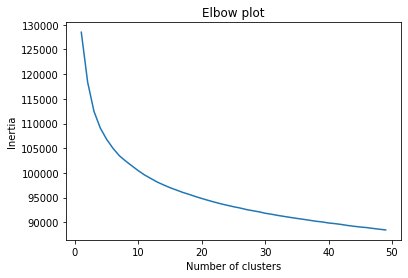

In [0]:
import matplotlib.pyplot as plt
plt.plot(n_clusters,inertia)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

k= 50
k= 200
k= 500
k= 750
k= 1000


Text(0, 0.5, 'Inertia')

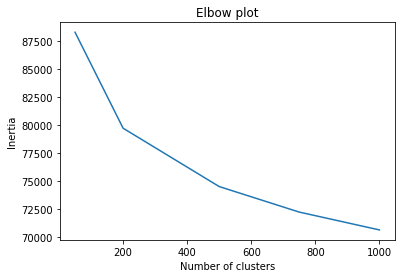

In [0]:
inertia = []
for each in [50,200,500,750,1000]:
    print("k=",each)
    kmeans = KMeans(n_clusters=each).fit(avg_w2v_vectors_tr)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot([50,200,500,750,1000],inertia)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [0]:
total_df.head(1)

,Id,Text,Topic,non_stopword_removed_preprocessed_text,preprocessed_text,preprocessed_text_no_code
0,0,"<p>Besides being ""one of the 7 meta questions ...",AIMeta,besides being one of the 7 meta questions eve...,besides one 7 meta questions every site ask pl...,besides one 7 meta questions every site ask pl...


**LDA**

**Lets hold on for clustering lets try with LDA I got very good insights out of it**

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#https://stackoverflow.com/questions/15899861/efficient-term-document-matrix-with-nltk/28727111
vec = CountVectorizer( lowercase=True,stop_words='english')
X = vec.fit_transform(total_df['preprocessed_text_no_code'].values)
#lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [0]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    "Function to print probability of finding n_top_words in a given topic"
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [0]:
# Define Search Param
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [10, 15, 20, 25, 30, 50, 75, 100]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params,n_jobs=-1)

# Do the Grid Search
model.fit(X)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'n_components': 10}
Best Log Likelihood Score:  -18822828.756546
Model Perplexity:  4413.638837901582


# Even tough we found out that the best model is with 10 topics let's explore with more number of topics

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=10, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
machine function state input problem turing proof time formula given

Topic #1:
algorithm time number problem element solution value case function array

Topic #2:
ai like game computer human user data use example intelligence

Topic #3:
data time memory bit tree number operation process need file

Topic #4:
language state regular problem automaton string np word set sigma

Topic #5:
data model value import set class 10 variable test loss

Topic #6:
point image distance vector matrix line pixel object cluster color

Topic #7:
data model network question learning feature use layer like using

Topic #8:
graph node edge vertex path tree problem algorithm set number

Topic #9:
language type string grammar rule lambda programming example like expression


In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=5, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
data time question like algorithm use problem need example way

Topic #1:
image import model question code def file word return data

Topic #2:
problem algorithm language time state set graph number edge input

Topic #3:
number tree point node type function value time element case

Topic #4:
model data value feature network use training using set output


In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=15, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
language string regular let set grammar word length mid sigma

Topic #1:
question answer problem ai computer machine human like think site

Topic #2:
element tree array list node number index time value sort

Topic #3:
time memory state value action game process need agent instruction

Topic #4:
file import code data return def python line column print

Topic #5:
graph edge vertex node path algorithm problem set weight cycle

Topic #6:
matrix tree algorithm search t1 method local gradient paper branch

Topic #7:
light float distribution texture ray int normal fn probability function

Topic #8:
language state type function machine program input turing example number

Topic #9:
network layer input output neural function weight image training loss

Topic #10:
point value image data set class number distance bit use

Topic #11:
data model learning use algorithm like using feature good example

Topic #12:
feature word variable data value column 10 vector row

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=20, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
function let leq cdot x1 xi tn fn set case

Topic #1:
import model def code return activation kera arelu data ytrain

Topic #2:
graph edge vertex node path algorithm problem set weight cycle

Topic #3:
state action reward policy address page agent transition rl environment

Topic #4:
number time element algorithm tree value array case list bit

Topic #5:
problem machine input turing time polynomial language proof reduction np

Topic #6:
class data model training set test sample value probability use

Topic #7:
return loop true int variable value false formula clause logic

Topic #8:
function grammar rule language lambda rightarrow like example term variable

Topic #9:
column 10 data file row import epoch loss 20 11

Topic #10:
state stack automaton transition symbol dfa set input process nfa

Topic #11:
question answer site tag post think user comment ask code

Topic #12:
word vector text document sentence sequence use similarity using input

Topic #13:

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=30, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
ai computer human learning machine intelligence algorithm like problem science

Topic #1:
import file column code data panda error df print dataframe

Topic #2:
language state regular string grammar automaton word sigma dfa mid

Topic #3:
flow 00 circuit gate nan quantum capacity var mathcal bob

Topic #4:
machine input turing problem language tm halt tape function program

Topic #5:
loss epoch random function entropy algorithm acc generator selection fitness

Topic #6:
problem algorithm graph edge vertex time set solution path number

Topic #7:
state action value agent reward function policy learning step algorithm

Topic #8:
memory time process block cache page access address data thread

Topic #9:
rule function definition proof true logic language set variable example

Topic #10:
bit game number player code encoding binary byte card representation

Topic #11:
code list language loop return int programming program stack function

Topic #12:
tree node 

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#https://stackoverflow.com/questions/15899861/efficient-term-document-matrix-with-nltk/28727111
vec = CountVectorizer( lowercase=True,stop_words='english')
X = vec.fit_transform(df['text_lemmatized'].values)
#lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=10, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
network layer input neural output function model training class image

Topic #1:
language ai regular type like program example word human programming

Topic #2:
point image object value action line game using pixel use

Topic #3:
matrix element array column row value index variable list l1

Topic #4:
question answer bit data site memory address file page table

Topic #5:
algorithm memory time process paper computer instruction cpu program operation

Topic #6:
problem machine input turing set time polynomial solution algorithm reduction

Topic #7:
data model feature use like using set learning time want

Topic #8:
graph node edge vertex path algorithm tree set problem weight

Topic #9:
number time algorithm state case function value string tree let


In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=20, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
arelu activation isame modeladdactivation import padding modeladdmaxpooling2dpoolsize2 modeladdflatten modeladdconv2d64 bitstrings

Topic #1:
jug pycm mcen cen crm hedge mcc comedy def 2colorable

Topic #2:
language regular state string grammar machine turing dfa automaton mid

Topic #3:
ciphertext cipher sock dcgan def publickey helicopter leftist diffiehellman unprovable

Topic #4:
bicliques xorsat cop biclique elba lzw gnf 00 flume 3dm

Topic #5:
hampath articulation blossom multiplexer def superlinear edmonds alphag postman xnor

Topic #6:
quickselect lalr1 skipgram slr1 lalr slr hashtags corenlp ato titan

Topic #7:
algorithm problem time number function graph node value set vertex

Topic #8:
rightregular enqueue dequeue extractmin callbyname rbrace l1cap alltm def alloy

Topic #9:
antonym testindex wmd trainindex nonrecognizable thetaj import aabaa nonprofit 1l

Topic #10:
coupon col1 col2 dcg fpgrowth poset col3 functors yesorno lorem

Topic #11:

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=22, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
glbindbufferglarraybuffer glgenbuffers1 glbufferdataglarraybuffer pne def glstaticdraw whisker glfloat telecom whp

Topic #1:
conda import toffoli salesperson 1l print cat1 spmf cat2 asi

Topic #2:
hampath automorphism import pancake knot def h1l omegai omegao treasure

Topic #3:
turingrecognizable corecognizable def lm2 import textm overlineatm turingdecidable mwrangle endian

Topic #4:
cgn og acceptor proposer bézier addon lcs thetag coupon ohn

Topic #5:
import beginmatrix dsse fib def list2 isotonic sorter list1 featured

Topic #6:
ac0 semilinear def concorde og wgan testandset imagecv genus aaaa

Topic #7:
data question like use image time model ai computer need

Topic #8:
language regular state string grammar automaton dfa machine turing expression

Topic #9:
model data feature network training layer learning use neural class

Topic #10:
3nf cnot qubit import entangled qubits 0rangle bcnf tcp 1rangle

Topic #11:
col1 col2 matroid class2 mcc cen co

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=25, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
adfa deepqa fsas qaccept airelated ec lorem textnotself alphag cyc

Topic #1:
lor qbf equisatisfiable 0rangle max2sat bdd hypergraph neg land 4sat

Topic #2:
pumping lemma pumped pump overlinea xyiz vxy uvxyz vwx ogden

Topic #3:
info endpmatrix beginpmatrix var1 var2 look xnor var3 timesharing decrypt

Topic #4:
slr a5 a6 sudo shiftreduce snn import yankee riceshapiro a8

Topic #5:
language problem graph vertex edge state regular string machine turing

Topic #6:
bdd christofides logn1 alltm bbbb link1 offsite link2 bdds stcon

Topic #7:
grammar production rightarrow mid rule contextfree parser derivation nonterminal language

Topic #8:
question algorithm problem computer time like type language function ai

Topic #9:
t2n spss boruta squarefree column1 bsa ye quine def column2

Topic #10:
data model feature use dataset value set training class variable

Topic #11:
vec3 vec4 float vec2 texture shadow roughness ray stencil shader

Topic #12:
bottle elmo i

### Few topics are really wierd Observe n_components=20 and topic 0 it conatains some programming key words.
In Stack overflow dataset along code their would be code also so using code for searching engine and vectorize it would be not good since in preprocessing only we would loose lot of information like its syntax and all so remove code and work by removing code.

> Indented block



In [0]:
total_df['Text'].values[79000]

'<p>I am trying to relate the following <a href="http://www.nuprl.org/MathLibrary/integer_sqrt/" rel="nofollow noreferrer">integer square root theorem</a> </p>\r\n\r\n<p><span class="math-container">$\\forall x: \\mathbb{N}, \\exists y : \\mathbb{N}((y^2 \\leq x) \\land  (x &lt; (y+1)^2))$</span></p>\r\n\r\n<p>and its proof to its role as a specification of the Integer Square Root <code>isqrt</code> (<span class="math-container">$\\lfloor \\sqrt{x} \\rfloor$</span>) function in a Haskell program.</p>\r\n\r\n<p>Below is a <a href="https://math.stackexchange.com/questions/2891932/inductive-proof-using-fitch-software">inductive proof</a> of the theorem and the related Haskell program. \r\nThe proof was done using natural deduction in the <a href="https://www.press.uchicago.edu/ucp/books/book/distributed/L/bo12734345.html" rel="nofollow noreferrer">Fitch system</a>, hence there are notational differences between code and proof e.g. no <span class="math-container">$\\leq$</span> in Fitch. <

In [0]:
#https://stackoverflow.com/questions/159118/how-do-i-match-any-character-across-multiple-lines-in-a-regular-expression
def clean_code(text):
  """Clean's code and reference links from span tag"""
  text1 = re.sub(r"<code>((.|\n)*)<\/code>",r"",text)
  text1 = re.sub(r"<span((.|\n)*)<\/span>",r"",text1)
  return text1.lower()


In [0]:
preprocessed_post_text = []
for i in range(total_df.shape[0]):
    preprocessed_post_text.append(cleanhtml(clean_code(total_df['Text'].values[i])))
preprocessed_post_text = np.array(preprocessed_post_text)

In [0]:
preprocessed_post_text[:5]

array([' besides being "one of the 7 meta questions every site should ask", it\'s just plain important. an "ai stackexchange" site has been tried before, at least once, and possibly a few times.   and in the past, it\'s been killed for lack of activity.  :-( \r\n\r\n so... how so we promote this site well enough to attract a critical mass of participants? and how do we get people participating?   \r\n',
       " i've clicked on  chat  link, but the list is empty. also i've tried to create one, but i couldn't, as it's saying: \r\n\r\n \r\n   this room might already exist. \r\n \r\n\r\n but it's not there yet. \r\n",
       " i think this will be a crucial thing to figure out.  on the one hand, i think it's important to be as inclusive as possible, and avoid being overly pedantic and stay away from the extreme degree of elitism that infects many stackexchange sites.  but.. on the other hand, we want the site to be of interest to everyone from hobbyists to serious academic researchers.   

In [0]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+';
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = re.sub(url_regex, '', preprocessed_post_text[i]);

In [0]:
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = cleanpunc(preprocessed_post_text[i])

In [0]:
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = decontracted(preprocessed_post_text[i])



In [0]:
import time
start_time = time.clock()
# we take each title and we text-preprocess it.
for i in range(preprocessed_post_text.shape[0]):
    preprocessed_post_text[i] = nlp_preprocessing(preprocessed_post_text[i])
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

28.683199000000002 seconds


In [0]:
preprocesses_text_df = pd.DataFrame(preprocessed_post_text, columns=['preprocessed_text_no_code'])
preprocesses_text_df.index = total_df.index
preprocesses_text_df['Id'] = total_df['Id']
total_df = total_df.merge(preprocesses_text_df, on='Id',how='left')

In [0]:
total_df.to_pickle('Preprocessed_questions_text_no_code.pkl')
total_df.head(5)

,Id,Text,Topic,non_stopword_removed_preprocessed_text,preprocessed_text,preprocessed_text_no_code
0,0,"<p>Besides being ""one of the 7 meta questions ...",AIMeta,besides being one of the 7 meta questions eve...,besides one 7 meta questions every site ask pl...,besides one 7 meta questions every site ask pl...
1,1,"<p>I've clicked on <em>chat</em> link, but the...",AIMeta,i have clicked on chat link but the list is...,clicked chat link list empty also tried create...,clicked chat link list empty also tried create...
2,2,<p>I think this will be a crucial thing to fig...,AIMeta,i think this will be a crucial thing to figur...,think crucial thing figure one hand think impo...,think crucial thing figure one hand think impo...
3,3,<p>Are all questions asked on stats and data s...,AIMeta,are all questions asked on stats and data sci...,questions asked stats data science se also top...,questions asked stats data science se also top...
4,4,<p>I've seen several questions that use the <a...,AIMeta,i have seen several questions that use the a...,seen several questions use artificialintellige...,seen several questions use artificialintellige...


In [0]:
total_df.preprocessed_text_no_code[79000]

'trying relate following integer square root theorem proof role specification integer square root '

In [0]:
%cd /content/drive/My Drive/StackOverflow-Search-Engine-master
total_df = pd.read_pickle("Preprocessed_questions_text_no_code.pkl")

/content/drive/My Drive/StackOverflow-Search-Engine-master


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#https://github.com/KashifAS/3-Apply-k-NN-on-Donors-Choose-dataset/blob/master/3_DonorsChoose_KNN-Copy1.ipynb
import pickle

from tqdm import tqdm
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in total_df['preprocessed_text_no_code'].values: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)

print(len(avg_w2v_vectors_tr))
print(len(avg_w2v_vectors_tr[0]))

137035
300


# Now resume clustering

**Query = What is Artificial Intelligence**

In [0]:
n_clusters = []
for i in range(1,50):
    n_clusters.append(i)
    
inertia = []
for each in n_clusters:
    print("k=",each)
    kmeans = KMeans(n_clusters=each).fit(avg_w2v_vectors_tr)
    inertia.append(kmeans.inertia_)

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49


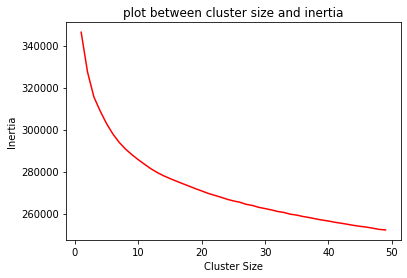

In [0]:
#Plot between cluster size and inertia
plt.plot(n_clusters, inertia, color='red')
plt.title('plot between cluster size and inertia')
plt.xlabel('Cluster Size')
plt.ylabel('Inertia')
plt.show()

**Choose K = 10**

In [0]:
#k = 10
kmeans = KMeans(n_clusters = 10,n_jobs = -1).fit(avg_w2v_vectors_tr)

In [0]:
import joblib
# save the model to disk
filename = 'cluster.sav'
joblib.dump(kmeans, filename)



['cluster1.sav']

In [0]:
import pickle
pickle.dump(kmeans, open('cluster2.sav', 'wb'))

In [0]:
import joblib
# some time later...
filename = 'cluster.sav'
# load the model from disk
kmeans = joblib.load(filename)

In [0]:
#Counting number of docs in each cluster
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []



for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 3:
        cluster3.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 4:
        cluster4.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 5:
        cluster5.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 6:
        cluster6.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 7:
        cluster7.append(avg_w2v_vectors_tr[i])
    elif kmeans.labels_[i] == 8:
        cluster8.append(avg_w2v_vectors_tr[i])
    else :
        cluster9.append(avg_w2v_vectors_tr[i])
  
print("No. of reviews in Cluster-1 : ",len(cluster0))
print("\nNo. of reviews in Cluster-2 : ",len(cluster1))
print("\nNo. of reviews in Cluster-3 : ",len(cluster2))
print("\nNo. of reviews in Cluster-4 : ",len(cluster3))
print("\nNo. of reviews in Cluster-5 : ",len(cluster4))
print("\nNo. of reviews in Cluster-6 : ",len(cluster5))
print("\nNo. of reviews in Cluster-7 : ",len(cluster6))
print("\nNo. of reviews in Cluster-8 : ",len(cluster7))
print("\nNo. of reviews in Cluster-9: ",len(cluster8))
print("\nNo. of reviews in Cluster-10 : ",len(cluster9))

No. of reviews in Cluster-1 :  13123

No. of reviews in Cluster-2 :  18339

No. of reviews in Cluster-3 :  16045

No. of reviews in Cluster-4 :  26272

No. of reviews in Cluster-5 :  12708

No. of reviews in Cluster-6 :  9983

No. of reviews in Cluster-7 :  406

No. of reviews in Cluster-8 :  10256

No. of reviews in Cluster-9:  11224

No. of reviews in Cluster-10 :  18679


Word Cloud for cluster 0


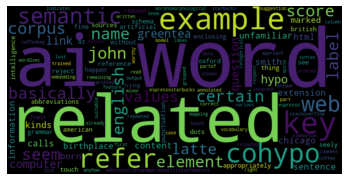

Word Cloud for cluster 1


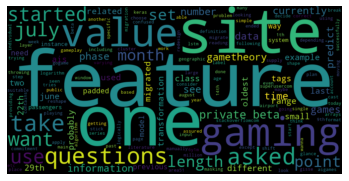

Word Cloud for cluster 2


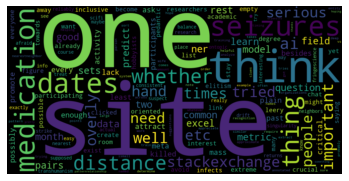

Word Cloud for cluster 3


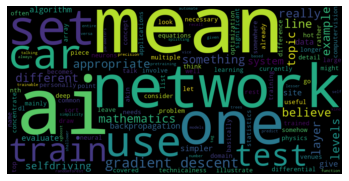

Word Cloud for cluster 4


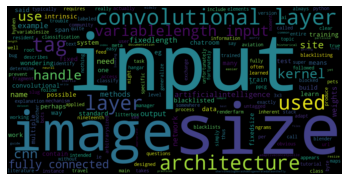

Word Cloud for cluster 5


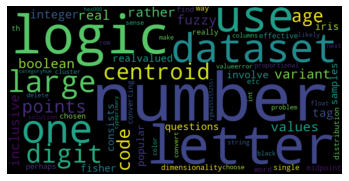

Word Cloud for cluster 6


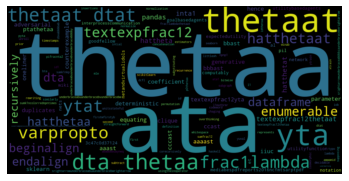

Word Cloud for cluster 7


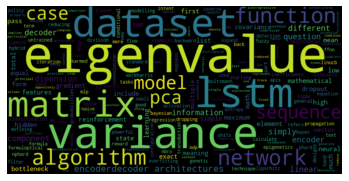

Word Cloud for cluster 8


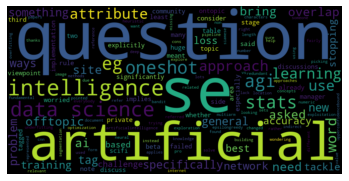

Word Cloud for cluster 9


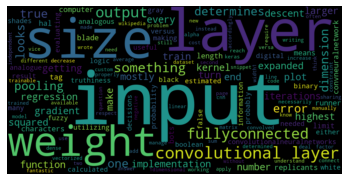

In [0]:
for i in range(0,10):
    print("Word Cloud for cluster", i)
    from wordcloud import WordCloud
    wc = WordCloud(width = 1000, height = 500).generate(str(total_df['preprocessed_text_no_code'].values[kmeans.labels_ == i]))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster'+str(i)+'.png')
    plt.show()

Approach used - clustering (No of clusters = 10) with slight modifications and "USE" embedding.
The problem with inverted hashing is that it is not preserving semantic meaning.
So I went with clustering.
Now the problem with clustering is with data-set corpus of stack overflow data set is lets say we have a word "ai" now "ai" refers to few things,
1. Artificial intelligence
2. Mathematical symbol
3. etc
![alt text](https://mail.google.com/mail/u/0?ui=2&ik=97fedf05ae&attid=0.4&permmsgid=msg-a:r3800042180264521455&th=17137131f02c43ef&view=fimg&sz=s0-l75-ft&attbid=ANGjdJ-lD2omdnzNUO5nH_YzVk2fYWodcpHpwxh6roW415vuH6LwLp5sTF5KE0H-ZuQvHKg9f4r5JPF9MOPxLm7wruGRUjN80TLyNUHZGD-O9WzE03MiBeIdpE1e57I&disp=emb&realattid=ii_k8ho5a1k4)
![alt text](https://mail.google.com/mail/u/0?ui=2&ik=97fedf05ae&attid=0.5&permmsgid=msg-a:r3800042180264521455&th=17137131f02c43ef&view=fimg&sz=s0-l75-ft&attbid=ANGjdJ95VDCd7y9PKQf5eQAvHfGV8iByJTT6hzs9zAzqVnxgPLW8qKmIlcpzV8Xcc4j81Z71shqgEuJnDdT_MIyP_dhr8seq9xtsgIySAwgCQlto_T4r3uCZdWlKWbU&disp=emb&realattid=ii_k8ho6dlu5)
![alt text](https://mail.google.com/mail/u/0?ui=2&ik=97fedf05ae&attid=0.6&permmsgid=msg-a:r3800042180264521455&th=17137131f02c43ef&view=fimg&sz=s0-l75-ft&attbid=ANGjdJ_TJgwLU9B-ZBS8Gs1FdovhxiraSPY6dnXciF_7v7YJFtiiawoI7Z8UuAg2dBWFbnF9oo4FD_2qeXinoqRtRFdcmE94csBpMbec7zCqBuB7ORRsIuc0sEzPx9M&disp=emb&realattid=ii_k8hoaygd6)
Now each cluster has "ai" each cluster with "ai" has its own meaning so in-order to tackle it, what I do is given query point I would find its 3 nearest cluster and find cosine similarity with the given query and with sentences which belong to 3 nearest cluster. And print docs with higher cosine similarity

In [0]:
from tqdm import tqdm
# Label each document belong's to which cluster
column_names = ["id","topic"]
topic_data_cluster = pd.DataFrame(columns = column_names)
for i in tqdm(range(len(avg_w2v_vectors_tr))):
  topic_data_cluster.loc[i] = [i, kmeans.labels_[i]]

100%|██████████| 137035/137035 [11:34<00:00, 197.29it/s]


In [0]:
#topic_data.to_pickle('topic_data.pkl')
topic_data_cluster.to_pickle('topic_data_cluster.pkl')
topic_data_cluster.tail(5)

,id,topic
137030,137030,2
137031,137031,1
137032,137032,2
137033,137033,4
137034,137034,3


In [0]:
topic_data_cluster = pd.read_pickle("topic_data_cluster.pkl")

In [0]:
#USE encoding for computing sematic similarity
import tensorflow as tf
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [0]:
def get_features(texts):
    """Returns use encoding"""
    if type(texts) is str:
        texts = [texts]
        return embed(texts)

In [0]:
query = "What is Artificial Intelligence".lower()
print(query)
query = cleanpunc(query)
query = decontracted(query)
query = nlp_preprocessing(query)
start_time = time.time()
sentence = query
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
vector = np.zeros(300) # as word vectors are of zero length
cnt_words =0; # num of words with a valid vector in the sentence/review
for word in sentence.split(): # for each word in a review/sentence
    if word in glove_words:
        vector += model[word]
        cnt_words += 1
if cnt_words != 0:
    vector /= cnt_words
avg_w2v_vectors_cv.append(vector)#import time
test_topic = kmeans.predict(avg_w2v_vectors_cv)[0]
docs = topic_data_cluster[topic_data_cluster['topic']== test_topic]['id'].values
print("--- %s seconds ---" % (time.time() - start_time))


what is artificial intelligence
--- 0.2406172752380371 seconds ---


In [0]:
#Finding 3 nearest cluster
cen = dict()
test = kmeans.transform(avg_w2v_vectors_cv)
for i in  range(kmeans.n_clusters):
  if i != test_topic:
    cen[i] = test[0][i]
    
top_items = []
#Sorting which has least distance from each cluster centroid to query point
a = sorted(cen.items(), key=lambda x: x[1]) [:3]
#print(len(doc_dict))
for i in range(3):
    top_items.append(a[i][0])
print(top_items)

[6, 0, 8]


In [0]:

doc1 = topic_data_cluster[topic_data_cluster['topic']== top_items[0]]['id'].values
doc2 = topic_data_cluster[topic_data_cluster['topic']== top_items[1]]['id'].values
doc3 = topic_data_cluster[topic_data_cluster['topic']== top_items[2]]['id'].values
docs = list(docs)
docs.extend(doc1)
docs.extend(doc2)
docs.extend(doc3)
docs = np.asarray(docs)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
test = get_features(query) # using USE vectorzing query
def similarity(docs_arg):
    for i in docs_arg:
        doc_dict[i] = cosine_similarity(train[i], test)[0][0]
    return doc_dict
        

In [0]:
from tqdm import tqdm
train = []
#Encoding corpus using USE encoding
for i in tqdm(range(total_df['preprocessed_text_no_code'].shape[0])):
  train.append(get_features(total_df['preprocessed_text_no_code'].values[i]))



100%|██████████| 137035/137035 [04:35<00:00, 497.63it/s]


In [0]:
start_time = time.time()
sentence = query

print("--- %s seconds ---" % (time.time() - start_time))
######################################################################################################################
doc_dict = dict()
n = math.floor(len(docs)/4)
pool = multiprocessing.Pool(processes=4)
tasks=[]
# Multiprocessing to compute cosine similarity
tasks.append(pool.apply_async(similarity,[docs[0:n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+1:n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+1:n+n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+n+1:]]))

pool.close()
pool.join()
for each in tasks:
    each.wait()
    doc_dict.update(each.get())

######################################################################################################################
top_items = []
#a[0][0]
a = sorted(doc_dict.items(), key=lambda x: x[1], reverse=True) [:10]
print(len(doc_dict))
for i in range(10):
    top_items.append(a[i][0])
    
print("--- %s seconds ---" % (time.time() - start_time))
#####################################################################################################################
for index in top_items:
    print (total_df.iloc[index,3])
    #print("*************************************************************************************************************")
    print (total_df.iloc[index,4])
    print("*************************************************************************************************************")


--- 0.0002415180206298828 seconds ---
35009
--- 4.775595188140869 seconds ---
 what is the definition of artificial intelligence 
definition artificial intelligence 
*************************************************************************************************************
     
artificial intelligence different machine learning 
*************************************************************************************************************
 what is the difference between artificial intelligence and robots 
difference artificial intelligence robots 
*************************************************************************************************************
  artificial intelligence a modern approach   
artificial intelligence modern approach 
*************************************************************************************************************
 what impact will artificial intelligence have on human society 
impact artificial intelligence human society 
**************************

# Let's see how does LDA works on text corpus by removing code

**Query = what is ai**

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#BOW vectorizer
vec = CountVectorizer( lowercase=True,stop_words='english')
X = vec.fit_transform(total_df.preprocessed_text_no_code)
#USE BOW IN LDA 

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=10, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
data model use using like training learning features set want

Topic #1:
time number algorithm array case elements numbers complexity size list

Topic #2:
problem algorithm graph tree time problems solution polynomial solve nodes

Topic #3:
language question programming type computer like program theory science languages

Topic #4:
question memory time graph point code path like points need

Topic #5:
set probability let formula random function given variables number true

Topic #6:
ai image network input state learning neural game human intelligence

Topic #7:
bits bit lemma pumping color texture number using compression point

Topic #8:
language machine state regular turing string input states languages finite

Topic #9:
function network layer weights use neural gradient output loss using


In [0]:
# Define Search Param
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [10, 15, 20, 25, 30, 50, 75, 100]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params,n_jobs=-1)

# Do the Grid Search
model.fit(X)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'n_components': 10}
Best Log Likelihood Score:  -14496110.20371435
Model Perplexity:  4012.44053169801


In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=15, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
network model training neural data layer function learning using input

Topic #1:
ai computer intelligence human artificial paper systems research theory information

Topic #2:
number function numbers value leq case probability let log bits

Topic #3:
data model use features using like dataset want set values

Topic #4:
matrix set graph vertex row vertices column cover matching rows

Topic #5:
image point points images object use like using line light

Topic #6:
state array elements states element string length input list number

Topic #7:
question questions answer like think site answers people time good

Topic #8:
machine turing language input finite function problem machines set lambda

Topic #9:
data memory code time use file process program table hash

Topic #10:
learning like game data machine ai action use learn agent

Topic #11:
graph tree node nodes path edges algorithm edge vertices vertex

Topic #12:
type formula programming variables true lo

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=20, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
graph path edges edge vertex vertices algorithm node nodes problem

Topic #1:
memory tree time data process node cpu address trees instruction

Topic #2:
file data langle python files rangle use database text format

Topic #3:
type lambda types matrix programming object function language program languages

Topic #4:
points point distance state space line action agent use algorithm

Topic #5:
function hash gradient table loss value use error learning cost

Topic #6:
ai words word intelligence like human language use text artificial

Topic #7:
data learning model like use time features problem want machine

Topic #8:
stack grammar rule rules parsing parse loop recursion parser left

Topic #9:
network neural input output layer networks layers function weights inputs

Topic #10:
code bits using use bit feature frame information encoding error

Topic #11:
language regular state string languages states strings finite set dfa

Topic #12:
question questions ans

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=25, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
time algorithm number complexity random numbers size probability log function

Topic #1:
sequence box black stack sequences mst spanning number solution minimum

Topic #2:
algorithm time array elements number list element case sort set

Topic #3:
tree node trees right left binary nodes root color height

Topic #4:
language regular string state grammar languages strings states dfa mid

Topic #5:
network neural output input layer function networks training use using

Topic #6:
model data training set test time use using regression models

Topic #7:
state problem action set agent algorithm optimal reward policy actions

Topic #8:
image matrix object using use pixel like images 3d space

Topic #9:
points point line distance light lines time segment area interval

Topic #10:
ai human intelligence game artificial people like humans systems player

Topic #11:
type function functions language programming logic languages types theory like

Topic #12:
question qu

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=30, n_jobs=-1)
lda.fit(X)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vec, number_words)

Topics found via LDA:

Topic #0:
time array algorithm elements number element list complexity case sort

Topic #1:
tree node nodes search trees root binary number right structure

Topic #2:
formula leq variables cdot tn let fn xi true log

Topic #3:
state stack loop expression states transition regular symbol automaton expressions

Topic #4:
number numbers sequence set given length let langle encoding pi

Topic #5:
data time like values use want variables using variable example

Topic #6:
problem solution algorithm points distance set optimal point given possible

Topic #7:
networks learning neural text algorithms used network paper machine genetic

Topic #8:
language machine turing regular input finite languages set proof prove

Topic #9:
game state learning action agent actions reward policy player reinforcement

Topic #10:
code python program programming use language like using run languages

Topic #11:
memory data file address cpu cache instruction page access block

Topic #12:
typ

20 topics

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
number_words = 10
lda = LatentDirichletAllocation(n_components=10, n_jobs=-1)
lda.fit(X)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [0]:
import joblib
#filename = 'LDA.sav'
filename = 'LDA_10.sav'
joblib.dump(lda, filename)
 

 


['LDA_10.sav']

In [0]:
# load the model from disk
import joblib
filename = 'LDA_10.sav'
lda = joblib.load(filename)


In [0]:

#print(np.argmax(lda.transform(X[0])))
column_names = ["id","topic"]
topic_data = pd.DataFrame(columns = column_names)
for i in range(X.shape[0]):
  topic_data.loc[i] = [i, np.argmax(lda.transform(X[i]))]

In [0]:
#topic_data.to_pickle('topic_data.pkl')
topic_data.to_pickle('topic_data_10.pkl')
topic_data.tail(5)

,id,topic
137030,137030,7
137031,137031,6
137032,137032,4
137033,137033,7
137034,137034,6


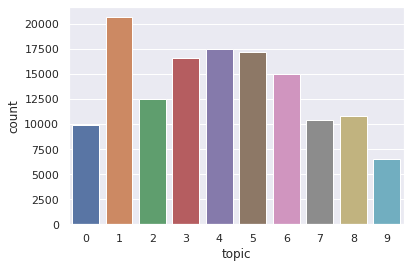

In [0]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="topic", data=topic_data)
#Try with best model with 10 topics

In [0]:
topic_data = pd.read_pickle("topic_data.pkl")

In [0]:
query = "what is ai"
Q_x = vec.transform([query])


ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
test_topic = np.argmax(lda.transform(Q_x))
print(lda.transform(Q_x))
docs = topic_data[topic_data['topic']== test_topic]['id'].values
print(test_topic)


[[0.05000001 0.05000266 0.54999088 0.05000101 0.05000392 0.05000002
  0.05       0.0500015  0.05       0.05      ]]
2


In [0]:
def similarity(docs_arg):
    """Creates a dict containg <doc_id, Cosine_simalarity between query and corresponding doc"""
    for i in docs_arg:
        #print('HI')
        doc_dict[i] = cosine_similarity([avg_w2v_vectors_tr[i]], avg_w2v_vectors_cv)
    return doc_dict

In [0]:
1# average Word2Vec
# compute average word2vec for each review.
start_time = time.time()
sentence = query
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
vector = np.zeros(300) # as word vectors are of zero length
cnt_words =0; # num of words with a valid vector in the sentence/review
for word in sentence.split(): # for each word in a review/sentence
    if word in glove_words:
        vector += model[word]
        cnt_words += 1
if cnt_words != 0:
    vector /= cnt_words
avg_w2v_vectors_cv.append(vector)#import time
print("--- %s seconds ---" % (time.time() - start_time))
######################################################################################################################
doc_dict = dict()
n = math.floor(len(docs)/4)
pool = multiprocessing.Pool(processes=4)
tasks=[]
#for each in [docs[0:n+1],docs[n+1:n+n+1],docs[n+n+1:]]:
tasks.append(pool.apply_async(similarity,[docs[0:n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+1:n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+1:n+n+n+1]]))
tasks.append(pool.apply_async(similarity,[docs[n+n+n+1:]]))

pool.close()
pool.join()
for each in tasks:
    each.wait()
    doc_dict.update(each.get())

######################################################################################################################
top_items = []
#a[0][0]
a = sorted(doc_dict.items(), key=lambda x: x[1], reverse=True) [:10]
print(len(doc_dict))
for i in range(10):
    top_items.append(a[i][0])
    
print("--- %s seconds ---" % (time.time() - start_time))
#####################################################################################################################
for index in top_items:
    print (total_df.iloc[index,3])
    #print("*************************************************************************************************************")
    print (total_df.iloc[index,4])
    print("*************************************************************************************************************")






--- 0.0003509521484375 seconds ---
10320
--- 1.2833693027496338 seconds ---
furthermore the ai can only steer the player every 13 second 
hey training initialized neural network method public void rlearnarraylist tupels double learningrate double discountfactor mldataset set new basicmldataset mldataset input new basicmldataset mldataset ideal new basicmldataset forint 0 mldata datain new basicmldata45 mldata dataout new basicmldata4 int index 0 fordouble w tupelsgetistatefirstelements datainaddindexw added state add new q values index 0 forint k 0 k k ifk tupelsgetiactiontaken new q value double currentqvalue tupelsgetiqactionsgetelementk double reward tupelsgetirewardafter calculate maximal q value next state double max doubleminvalue fordouble w tupelsgeti1qactionselements ifw max max w dataoutaddindexcurrentqvalue learningratereward discountfactormax currentqvalue else dataoutaddindex tupelsgetiqactionsgetelementk setadddataindataout systemoutprintlntraining data setsize ifsetsize 

**For the same query = what is ai clustering with choosing 3 nearest cluster would give better results**
![alt text](https://mail.google.com/mail/u/0?ui=2&ik=97fedf05ae&attid=0.2&permmsgid=msg-a:r3800042180264521455&th=17137131f02c43ef&view=fimg&sz=s0-l75-ft&attbid=ANGjdJ8FR5KFlaAnyfTjcsdfMexYxWJdQM46QbDq0BMRs6k6TQ5zUZ2xpGt0c1oIVMu-eNx2_gh6GI8RVvOiwk8TURu685HBkRFjDYEQUqBEU8S5fv1beaOcKWEMQgU&disp=emb&realattid=ii_k8hnsjrv2)